# Training and Visualizing a Decision Tree

In [1]:
#Let's build a decision tree and train it on the iris dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data[:, 2:] #petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2)

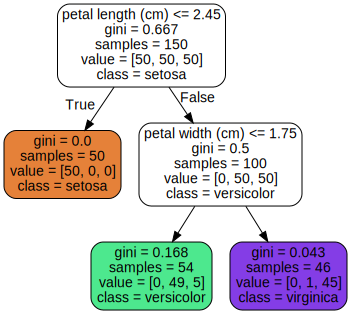

In [33]:
#Let's look at the image
from sklearn.tree import export_graphviz
import os
from graphviz import Source
from sklearn import tree
from IPython.display import SVG

graph = Source( export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True))

SVG(graph.pipe(format='svg'))

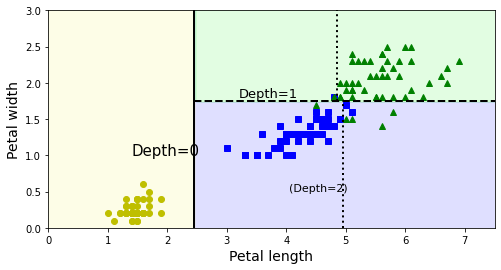

In [23]:
#samples = how many training instances the node applies to
#value = how many instanfes of each class it applies to
#gini = impurity: a node is "pure" if all training instances it applies to are of the same class

#Let's look at the Decision Tree's decision boundaries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, x, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()


In [24]:
#The dotted line shows where another boundary would be created if we increased the maximum depth to 3

# Estimating Class Probabilities

In [25]:
#We can find the probability that an instance belongs to a particular class as follows
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [27]:
#As you can see, the class stored in array index 1 has the greatest probability. If we now predict the class itself, we wil get array index 1
tree_clf.predict([[5, 1.5]])

array([1])

# Regression

In [34]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
x = np.random.rand(m, 1)
y = 4 * (x - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [35]:
#Decision Trees can also perform regression, as shown below
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x, y)

DecisionTreeRegressor(max_depth=2)

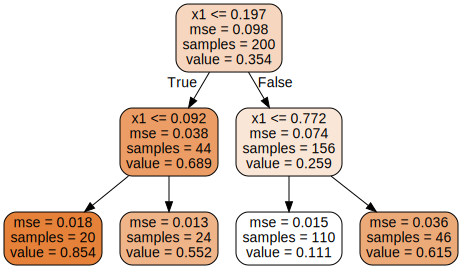

In [37]:
#We can look at the tree here
graph = Source( export_graphviz(
        tree_reg,
        out_file=None,
        feature_names=["x1"],
        rounded=True,
        filled=True)
    )

SVG(graph.pipe(format='svg'))

In [38]:
#Regression works the same as classification, except it predicts a value instead of a class. The CART algorithm
#also works the same, but minimizes MSE instead of impurities

# That is it for Decision Trees. A lot of the theory discussed in the book was not codifiable, so this was a pretty short one